In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('house-prices.csv')

In [46]:
df.head()

,area,price
0,1567,177067.50
1,3345,511748.20
2,3722,404096.67
3,2783,357916.31
4,2949,362409.54


In [47]:
x = df['area'].tolist()
y = df['price'].tolist()

In [35]:
class LinearRegression:
    def __init__(self):
        self.m = 0
        self.c = 0

    def fit(self, x, y):
        n = len(x)
        x_mean = sum(x) / n
        y_mean = sum(y) / n
 
        numerator = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))
        denominator = sum((x[i] - x_mean) ** 2 for i in range(n))

        self.m = numerator / denominator
        self.c = y_mean - self.m * x_mean

    def predict(self, X):
        return [self.m * x + self.c for x in X]

In [36]:
model = LinearRegression()
model.fit(x, y)

In [37]:
prediction = model.predict(x)

In [38]:
print("Slope (m):", model.m)
print("Intercept (c):", model.c)

Slope (m): 96.59803978824873
Intercept (c): 60953.77652271959


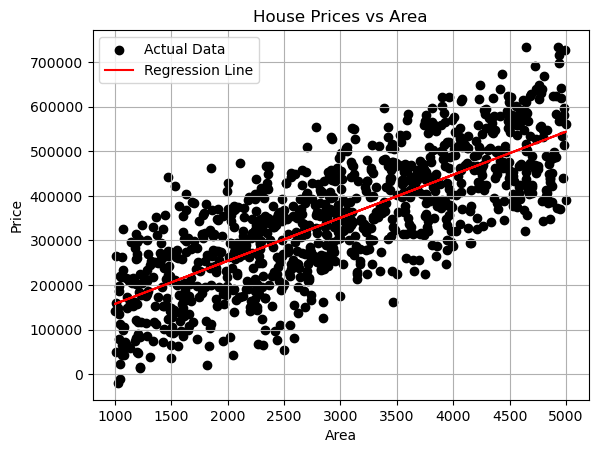

In [42]:
plt.scatter(x, y, color='black', label='Actual Data')
plt.plot(x, prediction, color='red', label='Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('House Prices vs Area')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.m = 0
        self.c = 0

    def fit(self, x, y):
        n = len(x)
        for _ in range(self.n_iterations):
            y_pred = self.predict(x)
            dm = (-2/n) * sum(x[i] * (y[i] - y_pred[i]) for i in range(n))
            dc = (-2/n) * sum(y[i] - y_pred[i] for i in range(n))
            self.m -= self.learning_rate * dm
            self.c -= self.learning_rate * dc

            mse = sum((y[i] - y_pred[i]) ** 2 for i in range(n)) / n

            

    def predict(self, X):
        return [self.m * x + self.c for x in X]



In [50]:
model_gd = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)
model_gd.fit(x, y)

In [51]:
prediction_gd = model_gd.predict(x)
print("Gradient Descent Slope (m):", model_gd.m)
print("Gradient Descent Intercept (c):", model_gd.c)

Gradient Descent Slope (m): nan
Gradient Descent Intercept (c): nan


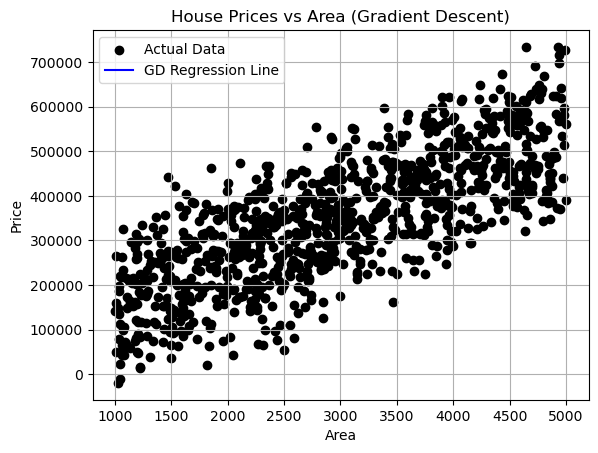

In [52]:
plt.scatter(x, y, color='black', label='Actual Data')
plt.plot(x, prediction_gd, color='blue', label='GD Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('House Prices vs Area (Gradient Descent)')
plt.legend()
plt.grid(True)
plt.show()